In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

from fbprophet import Prophet

C:\Users\Fida Hussain\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Fida Hussain\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Fida Hussain\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Fida Hussain\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df=pd.read_csv('../Data/Miles_Traveled.csv')


In [3]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
df.columns = ['ds', 'y']

In [5]:
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
df.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


# EDA

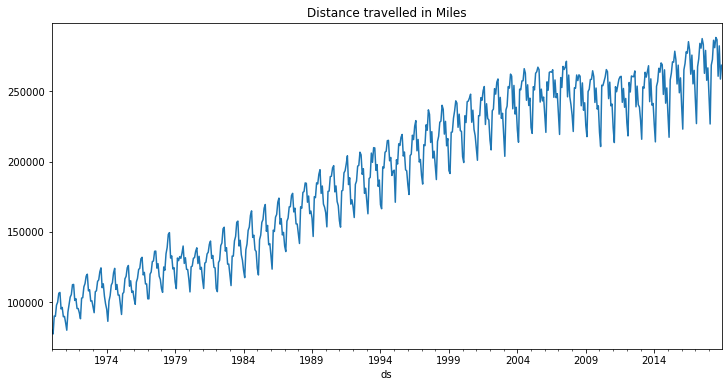

In [10]:
title = 'Distance travelled in Miles'
df.set_index('ds')['y'].plot(title=title);

# Train test Split

In [11]:
train = df.iloc[:-12]
test = df.iloc[-12:]

# Model

In [14]:
for i in ['additive', 'multiplicative']:
    model = Prophet(seasonality_mode=i).fit(train)
    future = model.make_future_dataframe(12,freq='MS')
    forecast = model.predict(future)
    from statsmodels.tools.eval_measures import rmse
    print('RMSE ' + i + ' :{}'.format(rmse(test['y'], forecast.iloc[-12:]['yhat'])) )                                    
                                         

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE additive :8750.25052083061
RMSE multiplicative :7139.2812324181305


In [15]:
model = Prophet(seasonality_mode='multiplicative').fit(train)
future = model.make_future_dataframe(12,freq='MS')
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


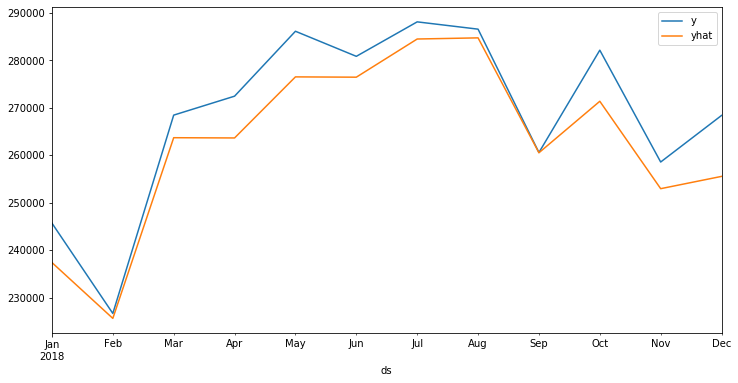

In [17]:
test.join(forecast.iloc[-12:]['yhat']).set_index('ds').plot();